In [4]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import osmnx as ox
import folium
from folium import plugins


In [5]:
# Ajout du fichier 
file = 'Datas/PAP_MAD_DA1.csv'
d1 = pd.read_csv(file, delimiter=';',
                 usecols = ['id','direccion','longitud','latitud'])
d1

,id,direccion,longitud,latitud
0,1517391,Pza. Mercurio FTE. Junta Municpal De Barajas,-3.577963,40.474533
1,1521210,Manuel Machado CV Alcalde Luis Marichalar,-3.659399,40.411356
2,1522416,Pe�a Gorbea N�2,-3.668876,40.398386
3,1522423,Estacion Cercanias Asamblea De Madrid,-3.668185,40.381887
4,1522705,Jos� Del Hierro N� 52,-3.643924,40.440141
...,...,...,...,...
1295,1525738,Paseo Infanta Isabel Cv Alfonso XII,-3.689215,40.407540
1296,1525741,Alberique CV Amposta (Metro Simancas),-3.622942,40.427567
1297,1525742,Jos� Del Hierro S/N (Parque El Calero),-3.650824,40.436075
1298,1525744,Plaza Carlos Tr�as Bertr�n 4,-3.694246,40.451057


In [6]:
d1[['latitud','longitud']]

,latitud,longitud
0,40.474533,-3.577963
1,40.411356,-3.659399
2,40.398386,-3.668876
3,40.381887,-3.668185
4,40.440141,-3.643924
...,...,...
1295,40.407540,-3.689215
1296,40.427567,-3.622942
1297,40.436075,-3.650824
1298,40.451057,-3.694246


In [7]:
geoDataF = geopandas.GeoDataFrame(d1, geometry=geopandas.points_from_xy(d1.longitud, d1.latitud))

In [8]:
print(geoDataF.head())

        id                                     direccion  longitud    latitud  \
0  1517391  Pza. Mercurio FTE. Junta Municpal De Barajas -3.577963  40.474533   
1  1521210     Manuel Machado CV Alcalde Luis Marichalar -3.659399  40.411356   
2  1522416                               Pe�a Gorbea N�2 -3.668876  40.398386   
3  1522423         Estacion Cercanias Asamblea De Madrid -3.668185  40.381887   
4  1522705                         Jos� Del Hierro N� 52 -3.643924  40.440141   

                    geometry  
0  POINT (-3.57796 40.47453)  
1  POINT (-3.65940 40.41136)  
2  POINT (-3.66888 40.39839)  
3  POINT (-3.66818 40.38189)  
4  POINT (-3.64392 40.44014)  


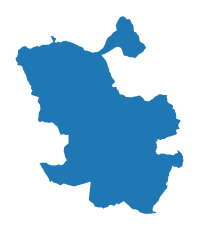

In [9]:
city = ox.geocode_to_gdf('Madrid, Madrid')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [10]:
m = folium.Map([40.4181388, -3.6597183], zoom_start=12)
pb = d1[['latitud','longitud']]
#https://livecodestream.dev/post/how-to-plot-your-data-on-maps-using-python-and-folium/

In [11]:
pb.head()

,latitud,longitud
0,40.474533,-3.577963
1,40.411356,-3.659399
2,40.398386,-3.668876
3,40.381887,-3.668185
4,40.440141,-3.643924


In [12]:
stationArr = pb.values
m.add_child(plugins.HeatMap(stationArr, radius=10))
m